**Problem : 2**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn . datasets import make_circles
from sklearn.neighbors import kneighbors_graph

From, the below code, is the same code given in question which is used to generate the some samples, and intilaizing the outer and inner labels.

In [2]:
n_samples = 280
X, y = make_circles(n_samples=n_samples , shuffle=False) 
outer, inner = 0, 1
labels = np.full(n_samples ,-1.0)
labels[0] = outer
labels[-1] = inner

Now, the below code help us create a figure with the raw data samples, into two class lables which are outer and inner labels. 

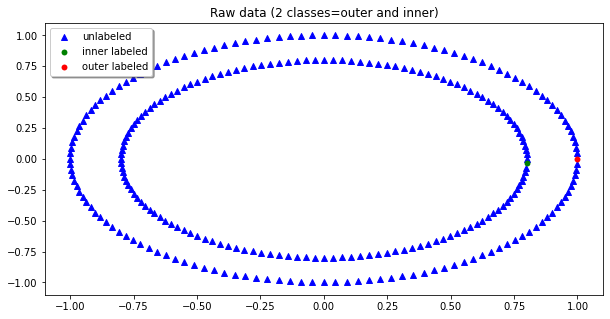

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.scatter(X[labels == -1, 0],X[labels == -1, 1],color="blue",marker="^",label="unlabeled",s=35,)
plt.scatter(X[labels == inner, 0],X[labels == inner, 1],color="green",marker="o",lw=0,label="inner labeled",s=35,)
plt.scatter(X[labels == outer, 0],X[labels == outer, 1],color="red",marker="o",lw=0,label="outer labeled",s=35,)
plt.title("Raw data (2 classes=outer and inner)")
plt.legend(scatterpoints=1, shadow=True, loc="upper left")
plt.show()

The below is the code for the Label spreading, we had implemented Label Spreading to classify data points from two circles. For this we have to create the the graph matrix, then we have to do the categorical distribution, Then by that we have start the process for the label distribution to entire raw data samples, and then by transduction we can assign the labels to the samples given.

In [4]:
def Labelspreadingalgo(X, y):  #defining the function for the Labelspreadingalgorithm
    alphadecay = 0.8           # Intialiazing the parameters as question mentioned alphadecay must be 0.8
    contol=0.001
    maximumiterations=150
    n_samples=len(y)           #n_samples nothing but the number samples given for the raw data.
    matgraph = kneighbors_graph(X, 6,include_self='auto') #Creating a graph matrix using the Kneighborsgraph which will used for the label distriubution.
    catdis = np.unique(y)
    catdis = catdis[catdis != -1]
    print('The classes distribution :',catdis) # printing label construction,construct a categorical distribution for classification
    print(' ')        
    no_of_classifications = len(catdis)
    print('The number of samples:',n_samples)
    print(' ')
    print('The sum of classification distrubutions are:',no_of_classifications)
    befores = np.zeros((X.shape[0], no_of_classifications)) #Label propagation for the process
    ldis = np.zeros((n_samples, no_of_classifications)) #Staring the label distribution process as below
    for i in catdis:
        ldis[y == i, catdis == i] = 1
    ps = np.copy(ldis)
    ps = ps *(1 - alphadecay) #Label spreading using the hyperparameter alphadecay 0.8
    for n in range(maximumiterations):
        sub=np.abs(ldis - befores).sum()
        if sub < contol:
            break
        befores = ldis
        mul=np.multiply(ldis, alphadecay) #soft clampping with the help of alphadecay 0.8
        ldis = mul+ps
        mul1=matgraph @ ldis
        ldis = mul1        
    li = np.sum(ldis, axis=1)[:, np.newaxis]
    li[li == 0] = 1
    ldis =ldis/li
    tra = catdis[np.argmax(ldis, axis=1)] #Now we are setting the transduction which can help us to assign the appropriate labels to the data sample.
    tra1 = tra.ravel()                    #Now with the help of transduction variable we can finally assign the labels.
    #print(tra)
    return tra1                           #In the end we are returning the Labels for the raw data samples.

Now, we are running the algorithm by given the labels and raw sample data as the parameters and stroring it and priniting the results.

In [5]:
results = Labelspreadingalgo(X, labels)
print(' ')
print('The resulting labels are :\n',results)

The classes distribution : [0. 1.]
 
The number of samples: 280
 
The sum of classification distrubutions are: 2
 
The resulting labels are :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


From the above we know that, from 0-139 raw data samples are assigned with 0 which are know to be outer learned labels and 140-279 raw data samples are assigned with 1 which are know to be inner leraned labels.

From the below code is used to repersent the figure for the labelled data(0's and 1's) in form of circles which can be explain the label spreading clearly.

The result array :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
The inner label numbers:
 [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 1

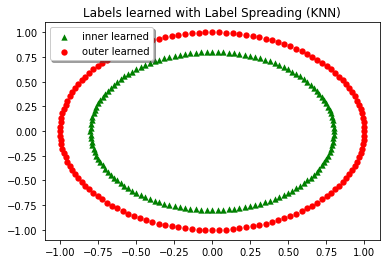

In [8]:
plt.subplot(1, 1, 1)
resa = np.asarray(results)
print('The result array :\n',resa)
i = np.where(resa == inner)[0]
o = np.where(resa == outer)[0]
print(' ')
print('The inner label numbers:\n',i)
print(' ')
print('The outer label numbers:\n',o)
plt.scatter(X[i, 0],X[i, 1],color="green",marker="^",lw=0,s=40,label="inner learned",)
plt.scatter(X[o, 0],X[o, 1],color="red",marker="o",lw=0,s=40,label="outer learned",)
plt.title("Labels learned with Label Spreading (KNN)")
plt.legend(scatterpoints=1, shadow=True, loc="upper left")
plt.show()

From the above results we can say that Labelspreading algorithm worked perfectly. 